In [2]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x800 with 0 Axes>

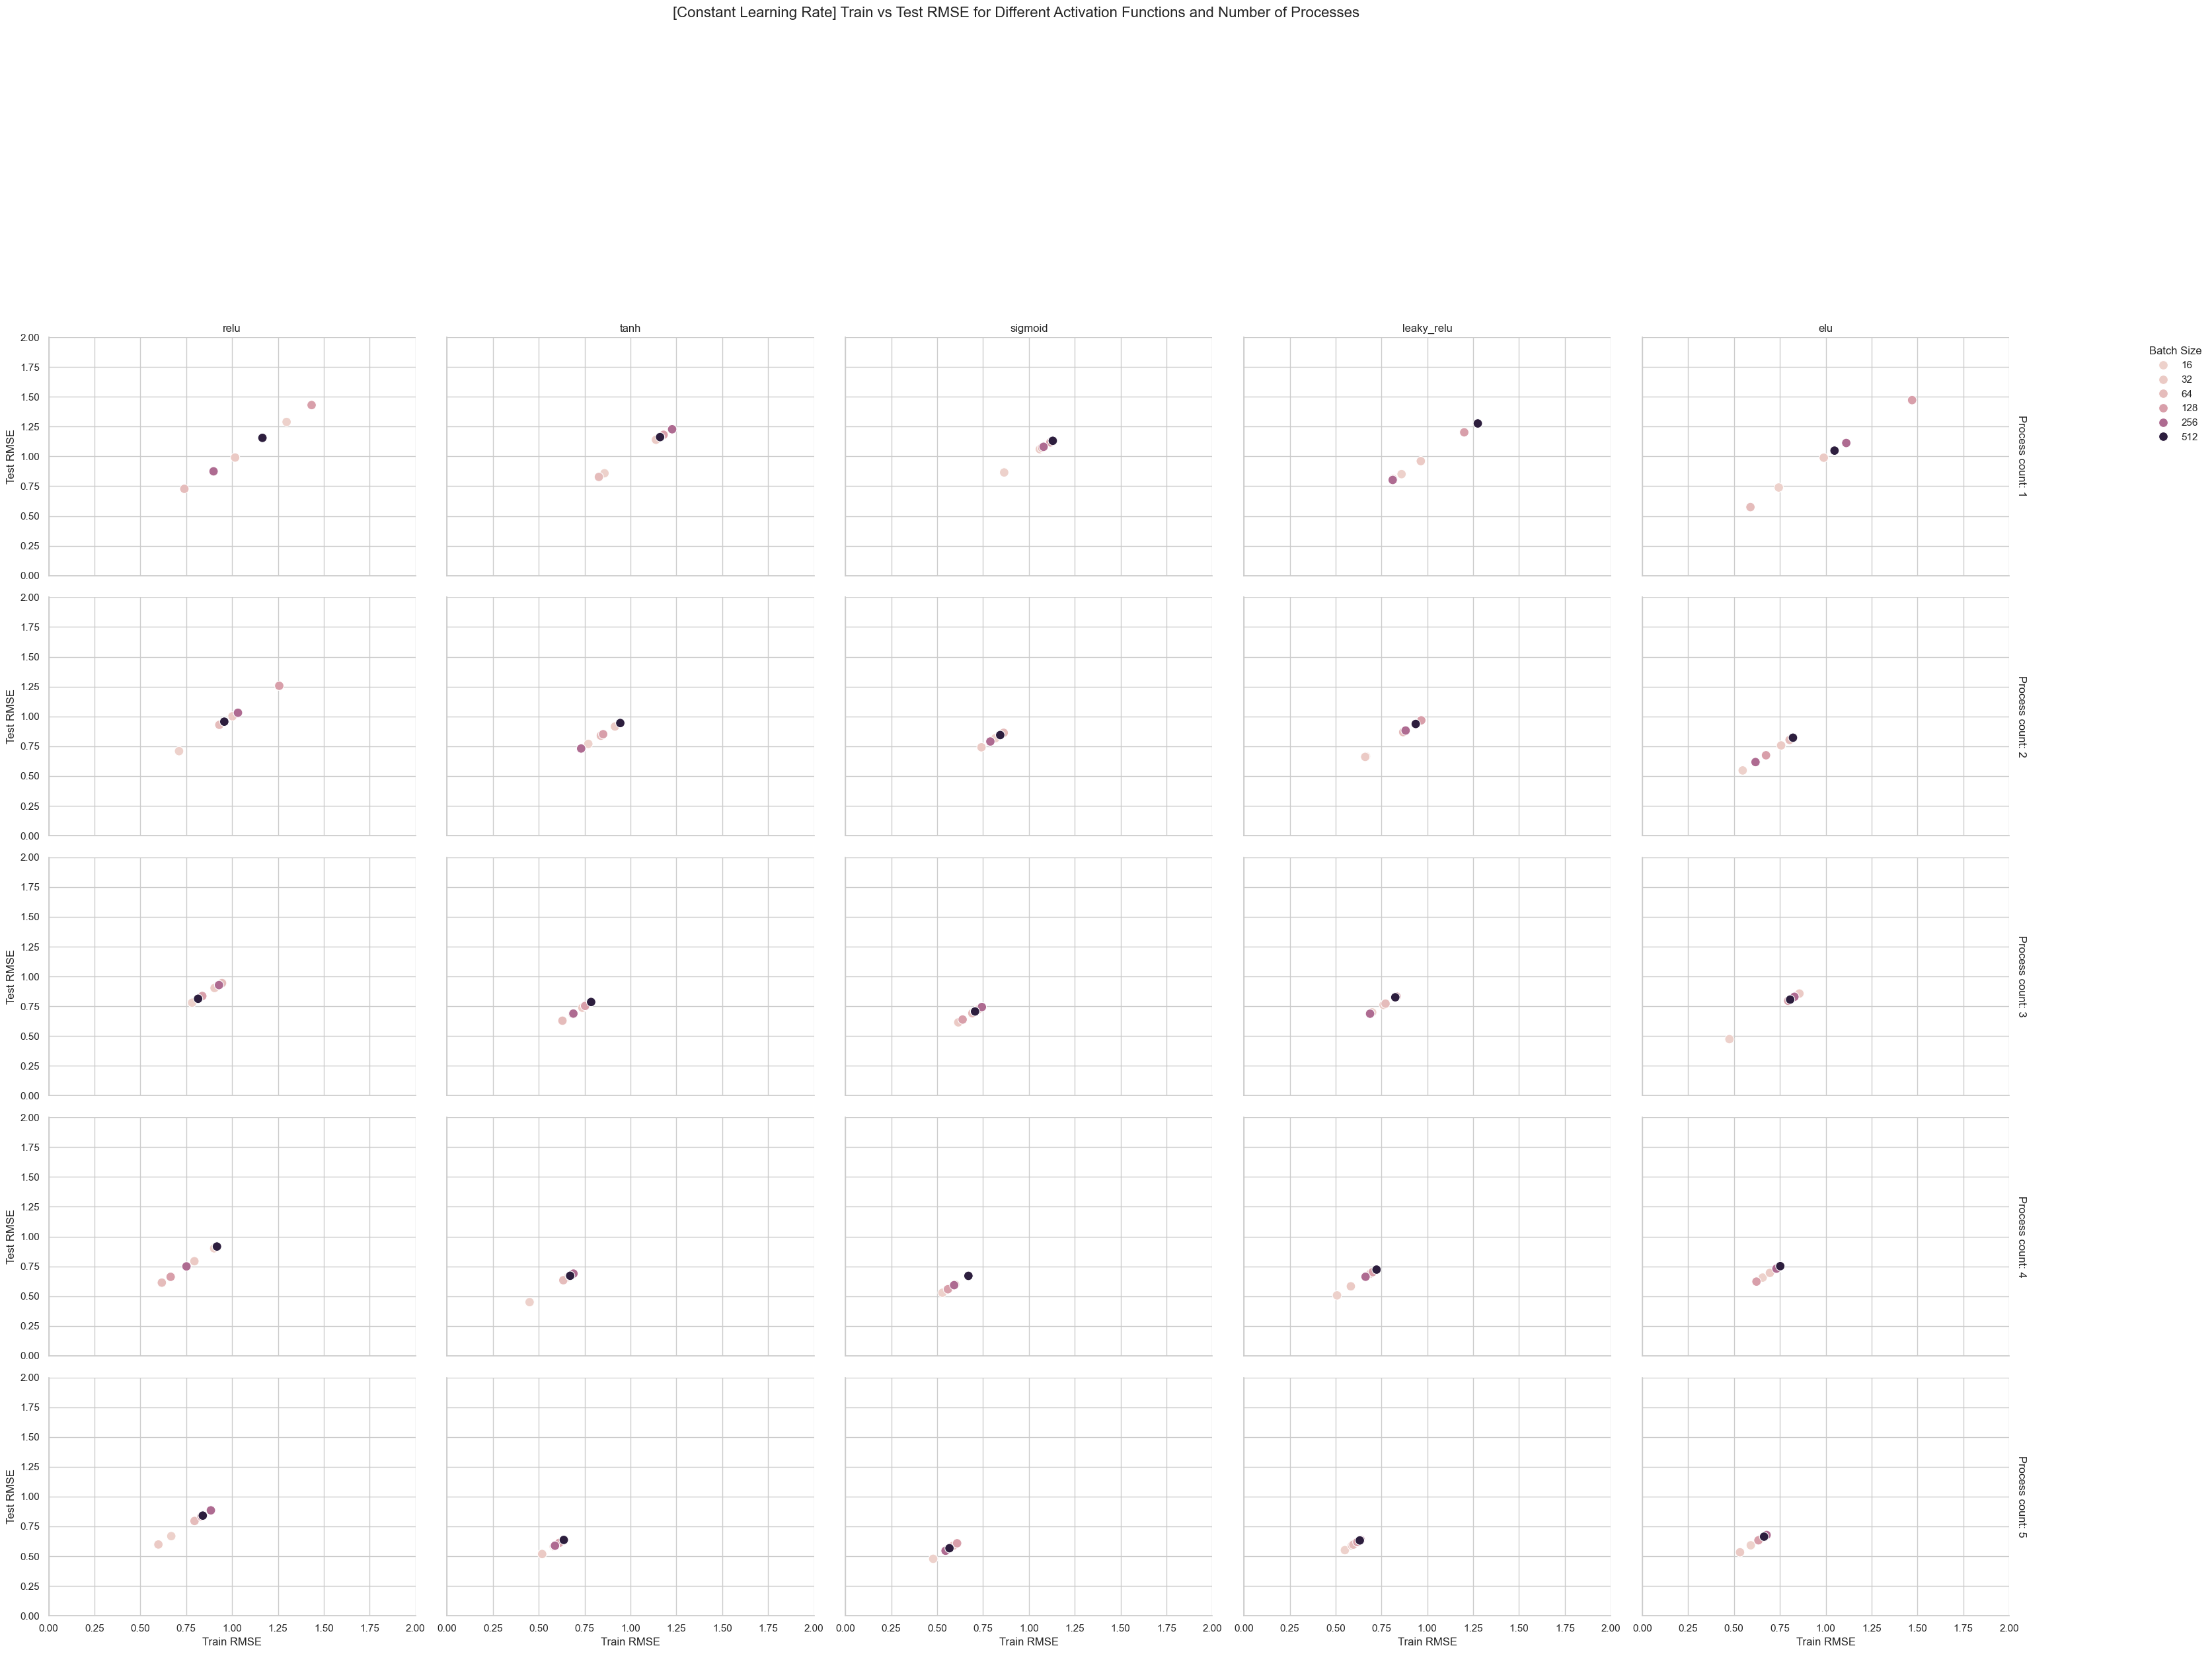

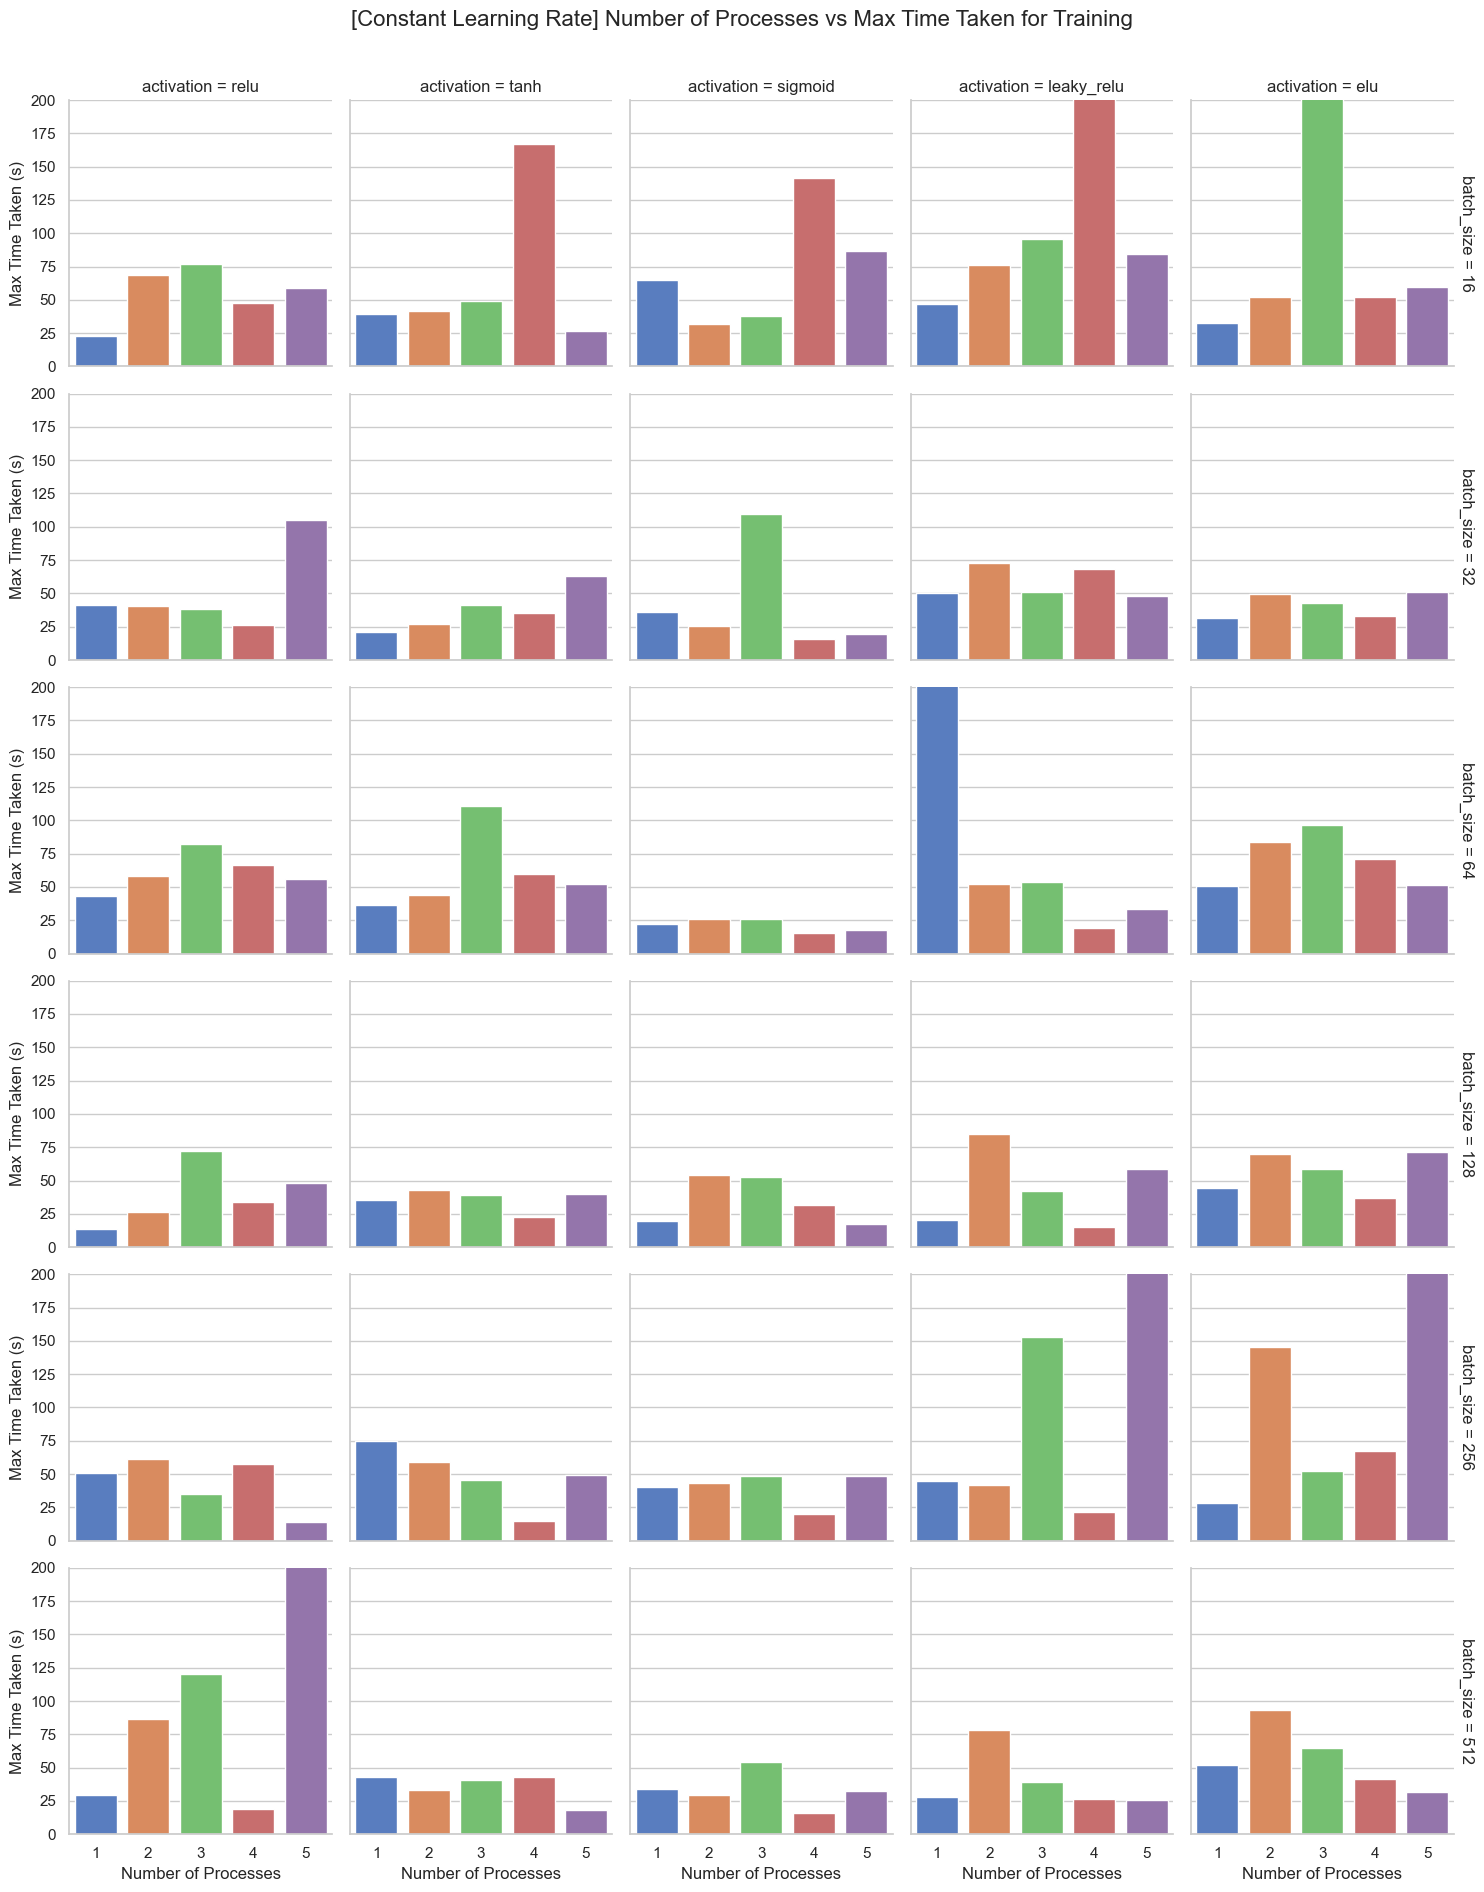

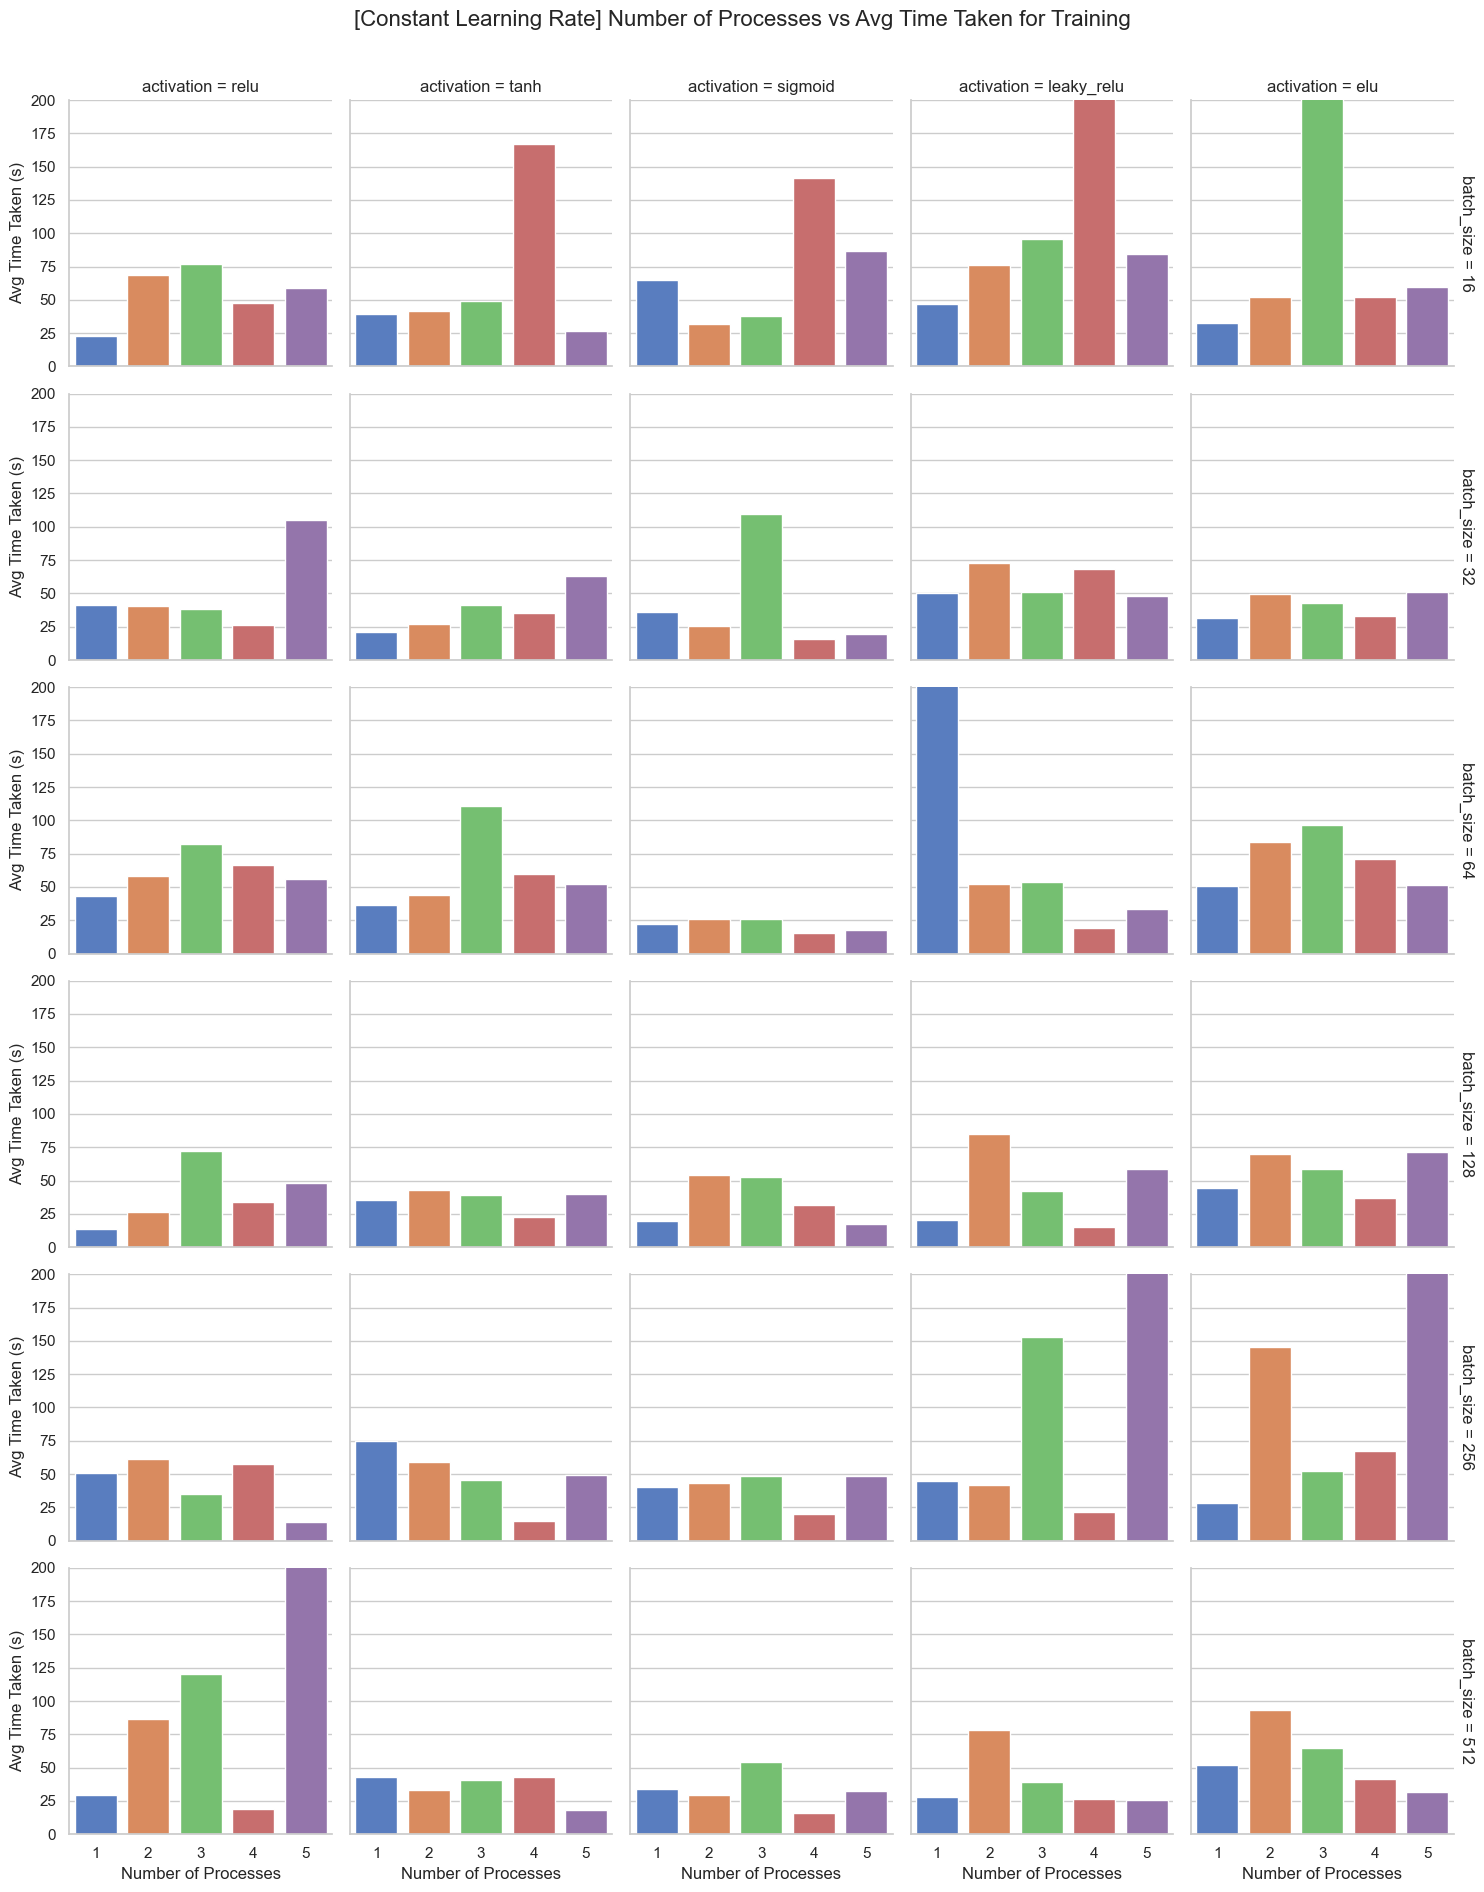

In [ ]:
# Generating plots for three different sets of test runs
# 1. constant learning rate - data is under logs/normalization_fix/new
# 2. cyclic without size factor - data is under logs/normalization_fix/cyclic_without_size_factor
# 3. cyclic with size factor - data is under logs/normalization_fix/cyclic_with_size_factor
# Creating plots for the following:
# 1. train vs test rmse, 
# 2. number of processes vs time taken for training (max and avg), 
# 3. training loss vs iteration, 
# 4. learning rate vs iteration

def create_plots(data_path, save_path, prefix):

    # import the test_train_rsme data
    data = pd.read_csv(f'{data_path}/train_test_rmse.csv', header=0)

    sns.set_theme(style="whitegrid")
    # plot test vs train rmse for different models
    # keep the scale of x and y axis the same
    plt.figure(figsize=(10, 8))
    g = sns.FacetGrid(data, col='activation', row='num_processes', margin_titles=True, height=4, aspect=1.5)
    g.map_dataframe(sns.scatterplot, x='train_rmse', y='test_rmse', hue='batch_size', s=100)
    # Set the y-axis limits for all facets
    g.set(ylim=(0, 2))
    # Set the x-axis limits for all facets
    g.set(xlim=(0, 2))
    g.set_axis_labels("Train RMSE", "Test RMSE")
    g.set_titles(col_template="{col_name}", row_template="Process count: {row_name}")
    # all legend outside the plot
    g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
    plt.tight_layout()
    plt.suptitle(f'[{prefix}] Train vs Test RMSE for Different Activation Functions and Number of Processes', fontsize=16, y=1.25)
    # add a title for the entire plot below the subplots, space the title from the subplots
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/train_test_rmse.png', bbox_inches='tight')
    plt.show()

    # plot a bar chart between number of processes and max time taken for training
    g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
    g.map_dataframe(sns.barplot, x='num_processes', y='train_time_max', palette='muted', hue ='num_processes', dodge=False)
    g.set_axis_labels("Number of Processes", "Max Time Taken (s)")
    g.set(ylim=(0, data['train_time_max'].mean() + 3 * data['train_time_max'].std()))  # set y limit to be within 3 std devs of the mean
    plt.tight_layout()
    plt.ylim(0, 200)
    plt.suptitle(f'[{prefix}] Number of Processes vs Max Time Taken for Training', fontsize=16, y=1.05)
    # add a title for the entire plot below the subplots, space the title from the subplots
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/process_train_time_max.png', bbox_inches='tight')
    plt.show()

    # plot a bar chart between number of processes and avg time taken for training
    g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
    g.map_dataframe(sns.barplot, x='num_processes', y='train_time_avg', palette='muted', hue ='num_processes', dodge=False)
    g.set_axis_labels("Number of Processes", "Avg Time Taken (s)")
    g.set(ylim=(0, data['train_time_max'].mean() + 3 * data['train_time_max'].std()))  # set y limit to be within 3 std devs of the mean
    plt.tight_layout()
    plt.ylim(0, 200)
    plt.suptitle(f'[{prefix}] Number of Processes vs Avg Time Taken for Training', fontsize=16, y=1.05)
    # add a title for the entire plot below the subplots, space the title from the subplots
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/process_train_time_avg.png', bbox_inches='tight')
    plt.show()

    # import the training metrics data
    # cap the y axis to be within 200
    training_data = pd.read_csv(f'{data_path}/training_metrics.csv', header=0)
    # plot training loss vs iteration for different models
    plt.figure(figsize=(12, 6))
    g = sns.FacetGrid(training_data, col="batch_size", row="num_processes", margin_titles=True, hue="activation", palette="muted")
    g.map(plt.plot, "iteration", "training_loss")
    g.set_axis_labels("Iteration", "Training Loss")
    g.add_legend(bbox_to_anchor=(1.05, 1.25), loc='upper right', title='Activation Function')
    plt.suptitle(f'[{prefix}] Training Loss vs Iteration', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.ylim(0, 50)
    plt.xlim(0, 25000)
    plt.savefig(f'{save_path}/training_loss.png', bbox_inches='tight')
    plt.show()

    # add a plot for learning rate vs iteration for different models
    plt.figure(figsize=(12, 6))
    g = sns.FacetGrid(training_data, col="batch_size", row="num_processes", margin_titles=True, hue="activation", palette="muted")
    g.map(plt.plot, "iteration", "learning_rate")
    g.set_axis_labels("Iteration", "Learning Rate")
    g.add_legend(bbox_to_anchor=(1.05, 1.25), loc='upper right', title='Activation Function')
    plt.suptitle(f'[{prefix}] Learning Rate vs Iteration', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.ylim(0, training_data['learning_rate'].max() +1e-5)
    plt.xlim(0, 25000)
    plt.savefig(f'{save_path}/learning_rate.png', bbox_inches='tight')
    plt.show()

# create plots for constant learning rate
create_plots('../../logs/normalization_fix/new', '../../logs/normalization_fix/constant_lr', 'Constant Learning Rate')
# create plots for cyclic without size factor
create_plots('../../logs/normalization_fix/cyclic_without_size_factor', '../../logs/normalization_fix/cyclic_without_size_factor', 'Cyclic Scheduler Learning Rate')
# create plots for cyclic with size factor
create_plots('../../logs/normalization_fix/cyclic_with_size_factor', '../../logs/normalization_fix/cyclic_with_size_factor', 'Hybrid Learning Rate')